In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

### FORMATTING DATA ###
data=pd.read_csv('diabetic_data.csv')
diag=data[['diag_1','diag_2','diag_3']]
data=data.drop(['admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','number_inpatient','number_emergency','number_outpatient','encounter_id','patient_nbr','weight','payer_code','A1Cresult','medical_specialty','max_glu_serum','diag_1','diag_2','diag_3'],axis=1)
data=data.drop(data[data.race=='?'].index)
data=data.drop(data[data.gender=='Unknown/Invalid'].index)
read=data['readmitted']
read=read.str.upper()
read=read.replace(['NO','<30','>30'],[0,1,1])
data=data.replace(['None','Female','No','Down'],0)
data=data.replace(['Male','Yes','Up','Steady'],1)
data=data.replace(['Down'],2)
r=pd.get_dummies(data[['race','diabetesMed']])
change=pd.get_dummies(data['change'])
a=pd.get_dummies(data['age'])
newdata=pd.concat([data,r,a,change],axis=1)
newdata=newdata.drop(['age','race','readmitted','change','diabetesMed'],axis=1)
X=data.drop(['readmitted'],axis=1)
read=np.array(read)
########################

#### SPLITTING DATA ####
x, X_test, y, y_test = train_test_split(newdata, read, test_size = 0.15, random_state = 0)
X_train,x_dev,y_train,y_dev=train_test_split(x,y,test_size=.18, random_state=0)
########################

In [22]:
#### Logistic Regression ####
models = []
#grid search along solver and C values
sol=['newton-cg', 'lbfgs', 'liblinear', 'sag']
cs=[.0001,.001,.01,.1,1,10,20,50,100,1000]
for s in sol:
    print("Testing",s)
    for c in cs:
        model = LogisticRegression(C=c,solver=s)
        model.fit(X_train,y_train)
        pred=(model.predict(x_dev))
        testy=np.array(y_dev)
        f = f1_score(testy,pred)
        print("  C =",c,": Accuracy:",round(acc,5),"F1:",round(f,5))
        acc=accuracy_score(pred,testy)
        models.append((model,acc,f))
        
top_acc = max(models,key=itemgetter(1))[1]
top_acc_f1 = max(models,key=itemgetter(1))[2]
top_model_acc = max(models,key=itemgetter(1))[0]

print('\nBest model score by accuracy:',top_acc,"\nfrom model:  ",top_model_acc)
print('\nCorresponding f1:',top_acc_f1)



Testing newton-cg
  C = 0.0001 : Accuracy: 0.55942 F1: 0.43988
  C = 0.001 : Accuracy: 0.55567 F1: 0.46392
  C = 0.01 : Accuracy: 0.55837 F1: 0.46637
  C = 0.1 : Accuracy: 0.55909 F1: 0.46736
  C = 1 : Accuracy: 0.55889 F1: 0.46696
  C = 10 : Accuracy: 0.55863 F1: 0.46685
  C = 20 : Accuracy: 0.55843 F1: 0.46688
  C = 50 : Accuracy: 0.5585 F1: 0.46688
  C = 100 : Accuracy: 0.5585 F1: 0.46688
  C = 1000 : Accuracy: 0.5585 F1: 0.46688
Testing lbfgs
  C = 0.0001 : Accuracy: 0.5585 F1: 0.43992
  C = 0.001 : Accuracy: 0.55541 F1: 0.46756
  C = 0.01 : Accuracy: 0.56014 F1: 0.47024
  C = 0.1 : Accuracy: 0.55909 F1: 0.47446
  C = 1 : Accuracy: 0.56066 F1: 0.46733
  C = 10 : Accuracy: 0.55975 F1: 0.46689
  C = 20 : Accuracy: 0.55896 F1: 0.45986
  C = 50 : Accuracy: 0.55896 F1: 0.46763
  C = 100 : Accuracy: 0.55922 F1: 0.46884
  C = 1000 : Accuracy: 0.55823 F1: 0.46947
Testing liblinear
  C = 0.0001 : Accuracy: 0.5583 F1: 0.37119
  C = 0.001 : Accuracy: 0.55153 F1: 0.43917
  C = 0.01 : Accuracy:

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


  C = 0.01 : Accuracy: 0.55837 F1: 0.46574
  C = 0.1 : Accuracy: 0.55948 F1: 0.46766
  C = 1 : Accuracy: 0.55942 F1: 0.46787
  C = 10 : Accuracy: 0.55935 F1: 0.46808
  C = 20 : Accuracy: 0.55942 F1: 0.46812
  C = 50 : Accuracy: 0.55948 F1: 0.46808
  C = 100 : Accuracy: 0.55942 F1: 0.46808
  C = 1000 : Accuracy: 0.55942 F1: 0.46804

Best model score by accuracy: 0.560664783551 
from model:   LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Corresponding f1: 0.474461731887


n_estimators = 10
	max_depth = 5
	50 iterations
	Best model score: 0.561847204887
	max_depth = 10
	50 iterations
	Best model score: 0.572620377061
	max_depth = 15
	50 iterations
	Best model score: 0.570715364908
10 estimators 	best at max_depth = 10 
score = 0.572620377061


n_estimators = 15
	max_depth = 5
	50 iterations
	Best model score: 0.564671878079
	max_depth = 10
	50 iterations
	Best model score: 0.574525389214
	max_depth = 15
	50 iterations
	Best model score: 0.571635025948
15 estimators 	best at max_depth = 10 
score = 0.574525389214


n_estimators = 20
	max_depth = 5
	50 iterations
	Best model score: 0.564540497931
	max_depth = 10
	50 iterations
	Best model score: 0.573737108323
	max_depth = 15
	50 iterations
	Best model score: 0.572554686987
20 estimators 	best at max_depth = 10 
score = 0.573737108323


Best accuracy: 0.574525389214  f1: 0.479717246365


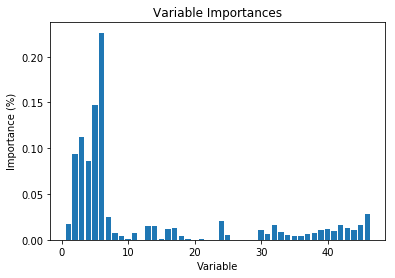

1 gender   2 time_in_hospital   3 num_lab_procedures   4 num_procedures   5 num_medications   6 number_diagnoses   7 metformin   8 repaglinide   9 nateglinide   10 chlorpropamide   11 glimepiride   12 acetohexamide   13 glipizide   14 glyburide   15 tolbutamide   16 pioglitazone   17 rosiglitazone   18 acarbose   19 miglitol   20 troglitazone   21 tolazamide   22 examide   23 citoglipton   24 insulin   25 glyburide-metformin   26 glipizide-metformin   27 glimepiride-pioglitazone   28 metformin-rosiglitazone   29 metformin-pioglitazone   30 race_AfricanAmerican   31 race_Asian   32 race_Caucasian   33 race_Hispanic   34 race_Other   35 [0-10)   36 [10-20)   37 [20-30)   38 [30-40)   39 [40-50)   40 [50-60)   41 [60-70)   42 [70-80)   43 [80-90)   44 [90-100)   45 0   46 Ch   

In [33]:
#### RANDOM FOREST ####


#hyperparameter grid search 
mxDepth = [5,10,15] #max_depth 
n_ests = [10,15,20] #n_estimators
best_models = []
for n in n_ests:
    print("n_estimators =",n)
    maximized_models=[]
    for mD in mxDepth:
        results = []
        print("\tmax_depth =",mD)
        for _ in range(51):
            model = RandomForestClassifier(n_estimators=n,max_depth=mD)
            model.fit(X_train,y_train)
            pred = model.predict(x_dev)
            testy=np.array(y_dev)
            print('\t'+str(_)+" iterations",end="\r",flush=True)

            results.append((model,accuracy_score(pred,testy)))
        print('\n\tBest model score:',max(results,key=itemgetter(1))[1])
        maximized_models.append((max(results,key=itemgetter(1))[0],max(results,key=itemgetter(1))[1],mD))

    print(n,"estimators","\tbest at max_depth =",max(maximized_models,key=itemgetter(1))[2],"\nscore =",max(maximized_models,key=itemgetter(1))[1])
    print("\n")
    best_models.append((max(maximized_models,key=itemgetter(1))[0],max(maximized_models,key=itemgetter(1))[1],n))

#grid search derived best model
final_best = max(best_models,key=itemgetter(1))[0]
f1 = f1_score(y_dev, final_best.predict(x_dev))

print("Best accuracy:",max(best_models,key=itemgetter(1))[1]," f1:",f1)
plt.bar(range(1,len(final_best.feature_importances_)+1),final_best.feature_importances_,ls="None")
plt.xlabel("Variable")
plt.ylabel("Importance (%)")
plt.title("Variable Importances")
plt.show()
for idx, column in enumerate(newdata.columns):
    print(idx+1, column, end="   ")

In [32]:
#### Baye's ####

#bayes doesn't work for the hold out method, so we won't have a dev set
train_X, test_X, train_y, test_y = train_test_split(data, read, test_size=0.3,random_state=0)
#print(train_X)
trainX=np.array(test_X)
trainy=np.array(test_y)

#print(trainX)
answers=[]
for thing in trainX:
   # print(len(thing))
    #num lab, diabetes meds, time in hospital <4
    if thing[2]==1 and thing[3]>=4 and thing[4]>=40 and thing[31]=='Yes':
       # print(thing[31])
        answers.append(1)
    else:
        answers.append(0)
i=0
#trainX=list(trainX)
test=0
for answer in answers:
    if answer==trainy[i]:
        test+=1
    i+=1
print("accuracy:",test/len(answers))

accuracy: 0.5408067542213884


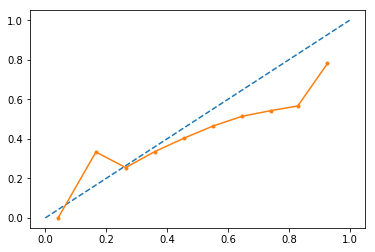

f1: 0.174603174603
accuracy: 0.535439795047


In [20]:
#### LinearSVC reliability diagram with calibration ####

# fit a model
model = LinearSVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(x_dev)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_dev, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()


#Predict and find accuracy
pred=(calibrated.predict(x_dev))
print("f1:",f1_score(pred,y_dev))
print("accuracy:",accuracy_score(pred,y_dev))


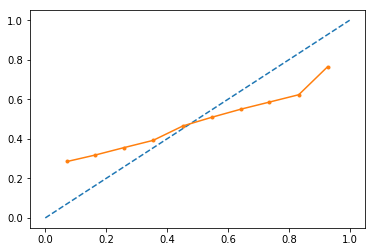

f1: 0.439672459893
accuracy: 0.559482362215


In [21]:
#### SVC BaggingClassifier diagram with calibration ####

n_estimators = 10
# fit a model
model = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(x_dev)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_dev, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

#Predict and find accuracy
pred=(calibrated.predict(x_dev))
print("f1:",f1_score(pred,y_dev))
print("accuracy:",accuracy_score(pred,y_dev))


In [27]:
#Random Forest yeilded the most accurate model
#Now we will run our model on the test set to get a final score
pred_final = final_best.predict(X_test)
print("\nfinal accuracy score:",accuracy_score(pred_final,np.array(y_test))," f1: ",f1_score(y_test,pred_final))


final accuracy score: 0.563320825516  f1:  0.452398958071
